In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
import kagglehub


/Users/Aoife 1/python/personal/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/Aoife 1/python/personal/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Downloading and Reading the data


In [2]:
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
filename = os.listdir(path)[0]
file_path = f'{path}/{filename}'

nRowsRead = 2000
df1 = pd.read_csv(file_path, delimiter=',', nrows = nRowsRead)
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Cleaning the data 

In [3]:
number_of_nans = df1.isnull().sum().sum() #checking for nan values in the data set

if number_of_nans !=0: #if there are nans, remove these rows 
    df1 = df1.dropna()

# Splitting the data 


In [4]:
X = df1.drop('Outcome', axis=1) #features
y = df1['Outcome'] #labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Model

In [5]:
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

# Predicting Outcomes

In [6]:
y_pred = model.predict(X_test)

# Confusion Matrix

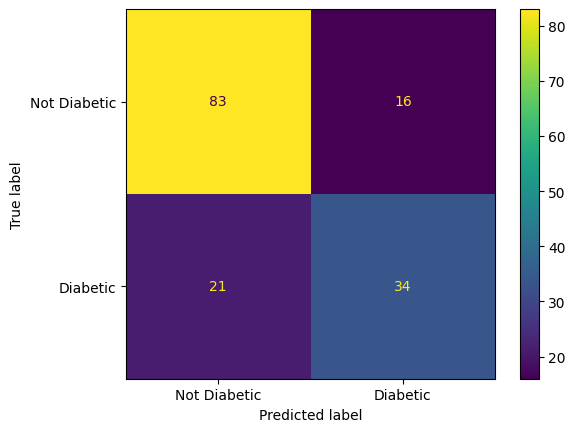

In [7]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Not Diabetic', 'Diabetic'])

cm_display.plot()
plt.show()

# Summary Report 

In [8]:
summary_metrics = metrics.classification_report(y_test, y_pred)
print(summary_metrics)



              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



# Hyperparameter Tuning

In [9]:
parameter_grid = param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['gini','entropy'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

In [10]:
model = GridSearchCV(DecisionTreeClassifier(),param_grid=parameter_grid)

model.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [11]:
print(model.best_estimator_)

DecisionTreeClassifier(max_depth=8, max_features=1.0, min_samples_split=0.25)


In [12]:
print(model.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 1.0, 'min_samples_split': 0.25}


In [13]:
print(model.best_score_)

0.7687458349993336


In [14]:
#using the best parameters
best_model = DecisionTreeClassifier(max_depth=8, criterion='gini', max_features=1.0, min_samples_split=0.25)
best_model.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=8, max_features=1.0, min_samples_split=0.25)

# Feature Importance

In [15]:
sorted_name, sorted_importance = [], []
important_feature = []
for importance, name in sorted(zip(best_model.feature_importances_, X_train.columns),reverse=True): #looping through the features and their corresponding importances, if no importance, assign to a list we can use to filter the features
    print(name, importance)
    sorted_name.append(name)
    sorted_importance.append(importance)
    if importance != 0:
        important_feature.append(name)



Glucose 0.575373442685358
BMI 0.2764783091202744
Age 0.14814824819436767
SkinThickness 0.0
Pregnancies 0.0
Insulin 0.0
DiabetesPedigreeFunction 0.0
BloodPressure 0.0


/var/folders/jj/h2srh54n2598yn1qz2jj90140000gn/T/ipykernel_45287/2339935689.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_name, rotation=90)


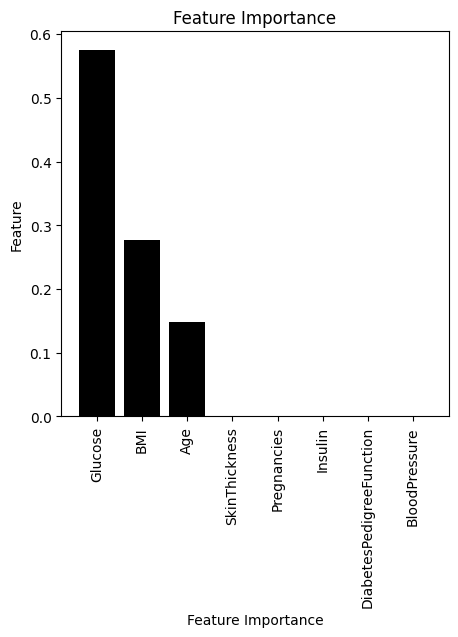

In [16]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()
plt.title('Feature Importance')
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature')
ax.bar(sorted_name, sorted_importance, color='k')
ax.set_xticklabels(sorted_name, rotation=90)
plt.show()

# Final Model

In [17]:
# only using the important features 
X = df1[important_feature]
y = df1['Outcome'] #labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

In [18]:
best_model = DecisionTreeClassifier(max_depth=8, criterion='gini', max_features=1.0, min_samples_split=0.25)
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_features=1.0, min_samples_split=0.25)

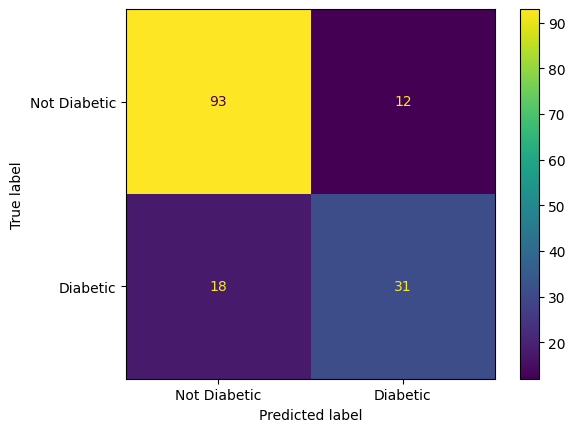

In [19]:
y_pred = best_model.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Not Diabetic', 'Diabetic'])

cm_display.plot()
plt.show()

In [20]:
summary_metrics = metrics.classification_report(y_test, y_pred)
print(summary_metrics)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.72      0.63      0.67        49

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154

